In [2]:
# Loading necessary library
library(readr)
library(ggplot2)
library(lmtest)
library(gridExtra)

In [81]:

# Loading the data
df <- read_csv('/content/processed_esti.csv')

# Displaying the data
print(df)


Rows: 1739 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): y, w, gender_female, gender_male, gender_transgender, ethnicgrp_as...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,739 × 15
       y     w gender_female gender_male gender_transgender ethnicgrp_asian
   <dbl> <dbl>         <dbl>       <dbl>              <dbl>           <dbl>
 1     1     1             0           1                  0               0
 2     0     0             0           1                  0               0
 3     0     1             0           1                  0               0
 4     0     0             1           0                  0               0
 5     1     1             1           0                  0               1
 6     1     1             0           1                  0               0
 7     1     1             1           0                  0               0
 8     0     0             0           1                  0               0
 9     0     1             0           1                  0               0
10     1     1             1           0                  0               0
# ℹ 1,729 more rows
# ℹ 9 more variables: ethnicgrp_black <dbl>, 

In [4]:
variables <- c('y', 'w', 'gender_female', 'gender_male', 'gender_transgender',
               'ethnicgrp_asian', 'ethnicgrp_black', 'ethnicgrp_mixed_multiple',
               'ethnicgrp_other', 'ethnicgrp_white', 'partners1', 'postlaunch',
               'age', 'imd_decile')

In [10]:
control_group <- df %>% filter(w == 0)
treatment_group <- df %>% filter(w == 1)

calculate_stats <- function(variable) {
  control_mean <- mean(control_group[[variable]], na.rm = TRUE)
  control_sd <- sd(control_group[[variable]], na.rm = TRUE)
  treatment_mean <- mean(treatment_group[[variable]], na.rm = TRUE)
  treatment_sd <- sd(treatment_group[[variable]], na.rm = TRUE)

  model <- lm(df[[variable]] ~ df$w)
  diff <- tidy(model)$estimate[2]

  return(c(control_mean, control_sd, treatment_mean, treatment_sd, diff))
}

balance_table <- data.frame(matrix(ncol = 5, nrow = 0))
for (variable in variables) {
  stats <- calculate_stats(variable)
  balance_table <- rbind(balance_table, stats)
}


colnames(balance_table) <- c('Control mean', 'Control sd', 'Treatment mean', 'Treatment sd', 'Diff')
rownames(balance_table) <- variables


balance_table


,Control mean,Control sd,Treatment mean,Treatment sd,Diff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
y,0.211491443,0.40861587,0.476655809,0.49972612,0.265164366
gender_female,0.580684597,0.49374895,0.587404995,0.49256858,0.006720398
gender_male,0.418092910,0.49354738,0.409337676,0.49197881,-0.008755233
gender_transgender,0.001222494,0.03496418,0.003257329,0.05701094,0.002034835
ethnicgrp_asian,0.055012225,0.22814362,0.071661238,0.25806630,0.016649013
ethnicgrp_black,0.092909535,0.29048323,0.080347448,0.27197804,-0.012562087
ethnicgrp_mixed_multiple,0.092909535,0.29048323,0.084690554,0.27857193,-0.008218982
ethnicgrp_other,0.017114914,0.12977898,0.009771987,0.09842263,-0.007342927
ethnicgrp_white,0.742053790,0.43777191,0.753528773,0.43119025,0.011474983


Rows: 1739 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): y, w, gender_female, gender_male, gender_transgender, ethnicgrp_as...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


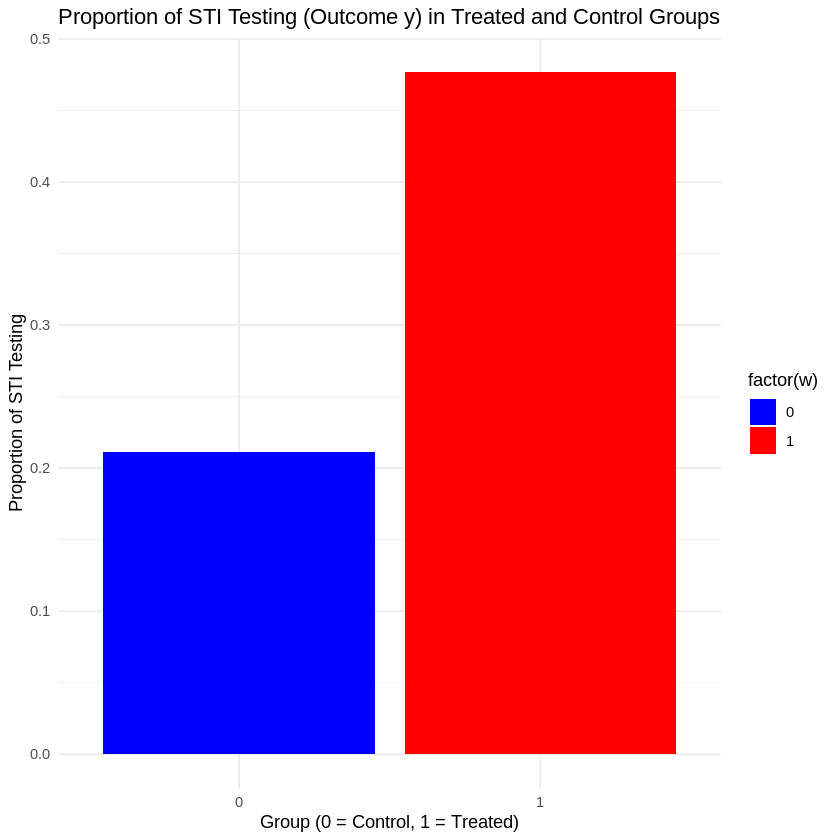

In [12]:
df <- read_csv('processed_esti.csv')

ggplot(df, aes(x = factor(w), y = y, fill = factor(w))) +
  geom_bar(stat = "summary", fun = "mean", position = "dodge") +
  scale_fill_manual(values = c("blue", "red")) +
  labs(
    title = 'Proportion of STI Testing (Outcome y) in Treated and Control Groups',
    x = 'Group (0 = Control, 1 = Treated)',
    y = 'Proportion of STI Testing'
  ) +
  theme_minimal()


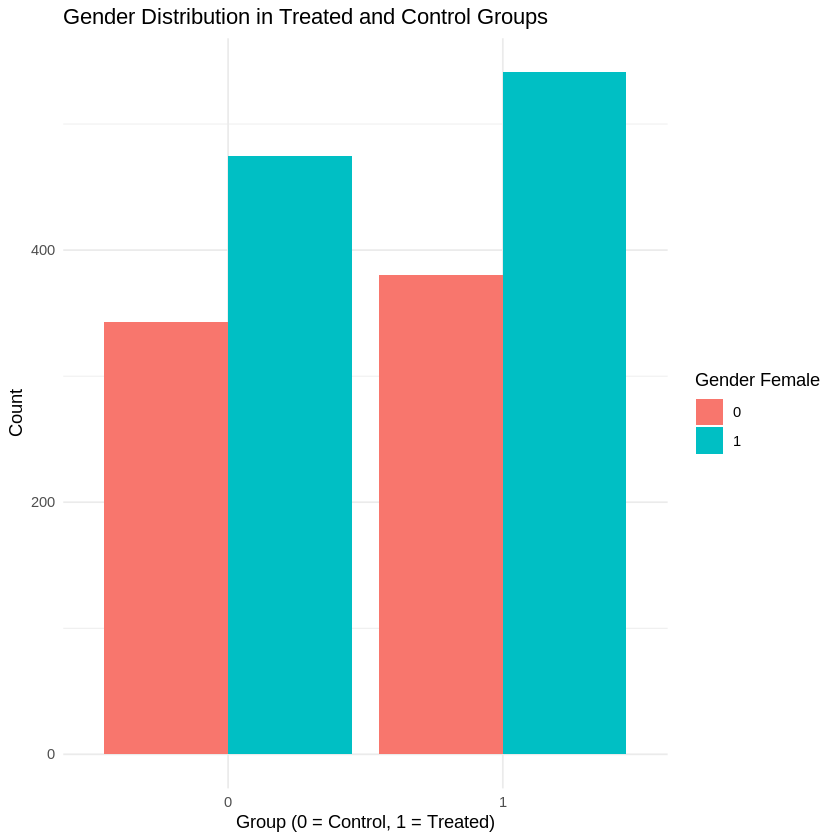

In [13]:
# Create the count plot
ggplot(df, aes(x = factor(w), fill = factor(gender_female))) +
  geom_bar(position = "dodge") +
  labs(
    title = 'Gender Distribution in Treated and Control Groups',
    x = 'Group (0 = Control, 1 = Treated)',
    y = 'Count',
    fill = 'Gender Female'
  ) +
  theme_minimal()


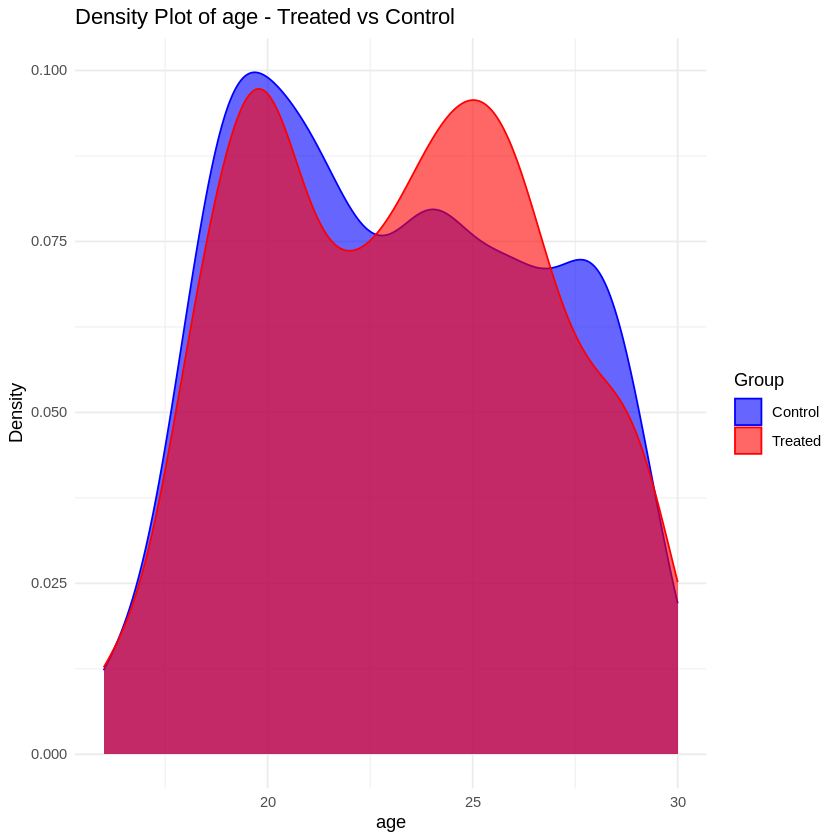

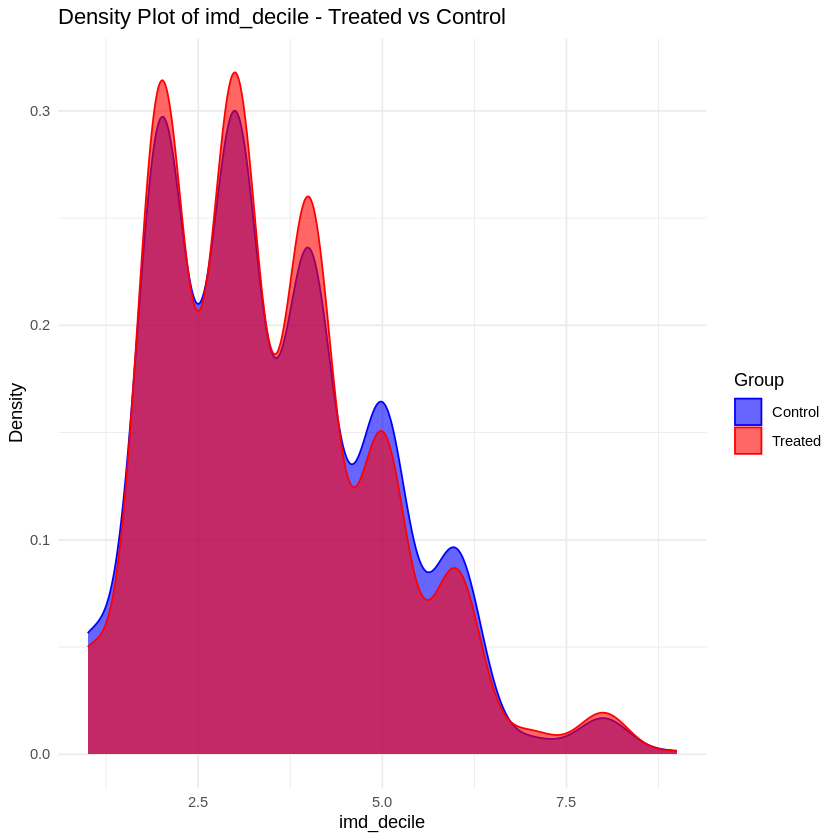

In [14]:
plot_combined_density_plots <- function(variable) {

  data_combined <- rbind(data.frame(Group = "Treated", Value = treatment_group[[variable]]),
                         data.frame(Group = "Control", Value = control_group[[variable]]))

  ggplot(data_combined, aes(x = Value, fill = Group, color = Group)) +
    geom_density(alpha = 0.6) +
    labs(title = paste("Density Plot of", variable, "- Treated vs Control"),
         x = variable, y = "Density") +
    theme_minimal() +
    scale_fill_manual(values = c("blue", "red")) +
    scale_color_manual(values = c("blue", "red")) +
    guides(fill = guide_legend(title = "Group"))
}

plot_combined_density_plots("age")
plot_combined_density_plots("imd_decile")


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




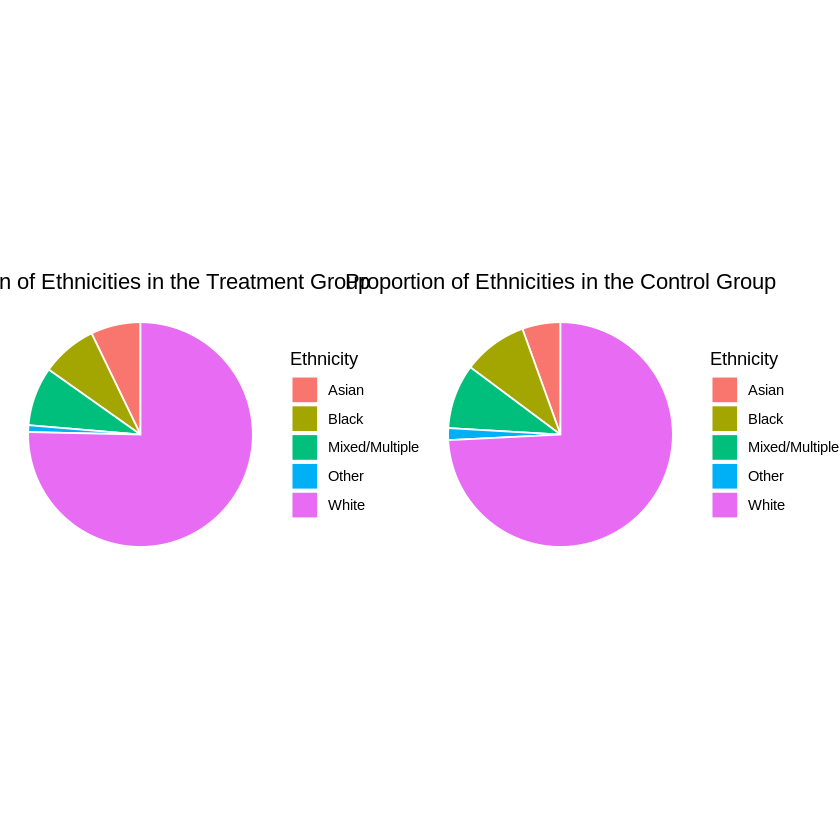

In [17]:
ethnicities <- c('ethnicgrp_asian', 'ethnicgrp_black', 'ethnicgrp_mixed_multiple', 'ethnicgrp_other', 'ethnicgrp_white')

treatment_counts <- colSums(treatment_group[ethnicities])
treatment_proportions <- treatment_counts / sum(treatment_counts)

control_counts <- colSums(control_group[ethnicities])
control_proportions <- control_counts / sum(control_counts)

ethnicity_labels <- c('ethnicgrp_asian' = 'Asian',
                      'ethnicgrp_black' = 'Black',
                      'ethnicgrp_mixed_multiple' = 'Mixed/Multiple',
                      'ethnicgrp_other' = 'Other',
                      'ethnicgrp_white' = 'White')

names(treatment_proportions) <- ethnicity_labels
names(control_proportions) <- ethnicity_labels

treatment_df <- data.frame(Ethnicity = names(treatment_proportions), Proportion = treatment_proportions)
control_df <- data.frame(Ethnicity = names(control_proportions), Proportion = control_proportions)


pie_treatment <- ggplot(treatment_df, aes(x = "", y = Proportion, fill = Ethnicity)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  ggtitle("Proportion of Ethnicities in the Treatment Group") +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5))

pie_control <- ggplot(control_df, aes(x = "", y = Proportion, fill = Ethnicity)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  ggtitle("Proportion of Ethnicities in the Control Group") +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(pie_treatment, pie_control, ncol = 2)


## Linear Regression Analysis

### Model 1: Y ~ T

In [19]:
Y <- df$y
T <- df$w

T <- data.frame(Intercept = 1, T)

model1 <- lm(Y ~ ., data = T)

summary(model1)




Call:
lm(formula = Y ~ ., data = T)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4767 -0.4767 -0.2115  0.5233  0.7885 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.21149    0.01605   13.17   <2e-16 ***
Intercept         NA         NA      NA       NA    
T            0.26516    0.02206   12.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4591 on 1737 degrees of freedom
Multiple R-squared:  0.0768,	Adjusted R-squared:  0.07627 
F-statistic: 144.5 on 1 and 1737 DF,  p-value: < 2.2e-16


### Model 2: Y ~ T + X

In [20]:
X <- df[, c('w', 'gender_female', 'gender_transgender', 'ethnicgrp_asian', 'ethnicgrp_black',
            'ethnicgrp_mixed_multiple', 'ethnicgrp_white', 'partners1', 'postlaunch',
            'msm', 'age', 'imd_decile')]
Y <- df$y

X <- cbind(Intercept = 1, X)

model2 <- lm(Y ~ ., data = X)

summary(model2)



Call:
lm(formula = Y ~ ., data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6765 -0.3546 -0.1919  0.4732  1.0411 

Coefficients: (1 not defined because of singularities)
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -0.076579   0.124242  -0.616 0.537729    
Intercept                       NA         NA      NA       NA    
w                         0.256224   0.021802  11.752  < 2e-16 ***
gender_female             0.094619   0.024900   3.800 0.000150 ***
gender_transgender        0.363822   0.228226   1.594 0.111091    
ethnicgrp_asian          -0.113221   0.104141  -1.087 0.277102    
ethnicgrp_black          -0.130744   0.101780  -1.285 0.199115    
ethnicgrp_mixed_multiple -0.129303   0.101387  -1.275 0.202360    
ethnicgrp_white          -0.041745   0.095520  -0.437 0.662149    
partners1                -0.057558   0.024361  -2.363 0.018254 *  
postlaunch                0.074806   0.022648   3.303 0.000976 ***
msm      

### Double Lasso

In [21]:
features <- df[, !(names(df) %in% "y")]
target <- df$y

features_matrix <- as.matrix(features)

lasso <- cv.glmnet(features_matrix, target, alpha = 1, nfolds = 5, type.measure = "mse",
                   family = "gaussian", standardize = TRUE, intercept = TRUE,
                   parallel = FALSE, seed = 0)

coef_lasso <- coef(lasso, s = "lambda.min")
selected_features <- which(coef_lasso != 0)

if (!("w" %in% colnames(features))) {
  stop("Variable 'w' not found in the data.")
}

if (!("w" %in% rownames(coef_lasso))) {
  selected_features <- c("w", selected_features)
} else {
  selected_features <- colnames(features)[selected_features]
}

X3 <- cbind(Intercept = 1, features[selected_features])

model3 <- lm(Y ~ ., data = X3)

summary(model3)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-8




Call:
lm(formula = Y ~ ., data = X3)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6059 -0.3473 -0.1778  0.4894  0.9985 

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.079566   0.042400   1.877 0.060746 .  
Intercept                 NA         NA      NA       NA    
w                   0.255420   0.021887  11.670  < 2e-16 ***
gender_female       0.090897   0.024977   3.639 0.000282 ***
gender_transgender  0.355772   0.227931   1.561 0.118736    
ethnicgrp_asian     0.006934   0.050156   0.138 0.890062    
ethnicgrp_white     0.089745   0.028378   3.162 0.001591 ** 
partners1          -0.064897   0.024402  -2.660 0.007898 ** 
postlaunch          0.094679   0.022164   4.272 2.04e-05 ***
msm                 0.008596   0.036795   0.234 0.815309    
imd_decile         -0.004388   0.007423  -0.591 0.554514    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual sta

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


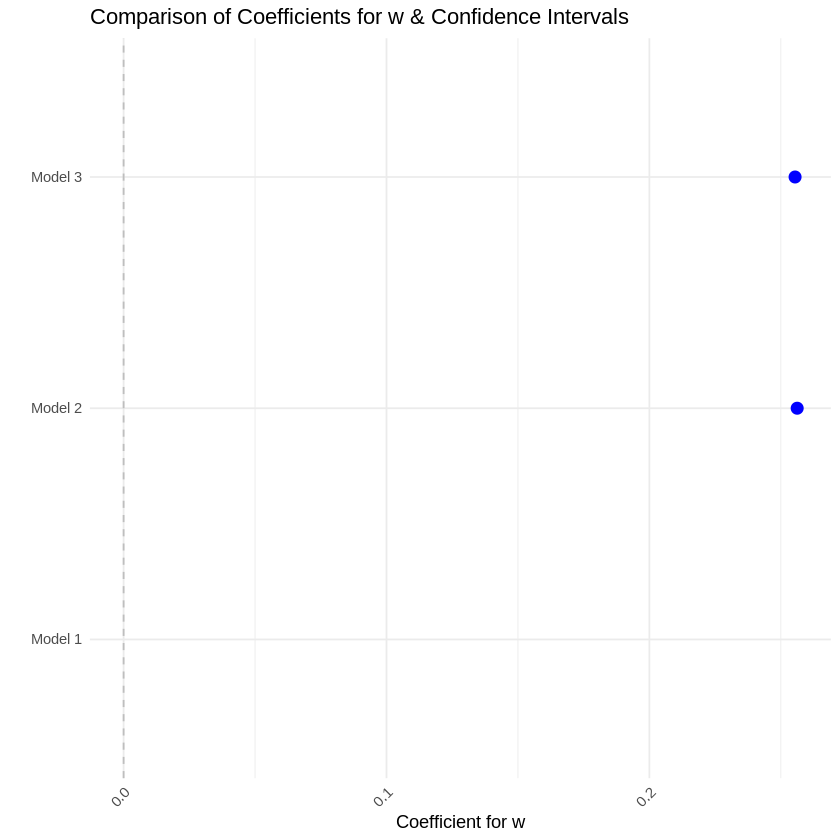

In [23]:
models <- c('Model 1', 'Model 2', 'Model 3')

coeffs <- numeric(length(models))
coeffs[1] <- coef(model1)['w']
coeffs[2] <- coef(model2)['w']
coeffs[3] <- coef(model3)['w']

conf_intervals <- matrix(NA, nrow = length(models), ncol = 2)
conf_intervals[1,] <- confint(model1)['w']
conf_intervals[2,] <- confint(model2)['w']
conf_intervals[3,] <- confint(model3)['w']

plot_data <- data.frame(models = models,
                        estimates = coeffs,
                        ci_lower = conf_intervals[,1],
                        ci_upper = conf_intervals[,2])

plot_data$error <- plot_data$estimates - plot_data$ci_lower

ggplot(plot_data, aes(x = models, y = estimates, ymin = ci_lower, ymax = ci_upper)) +
  geom_point(size = 3, color = 'blue') +
  geom_errorbar(aes(ymin = ci_lower, ymax = ci_upper), width = 0.2, color = 'blue', size = 1.2,
                position = position_dodge(width = 0.5)) +
  labs(title = 'Comparison of Coefficients for w & Confidence Intervals',
       x = '', y = 'Coefficient for w') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_hline(yintercept = 0, linetype = 'dashed', color = 'gray') +
  ylim(min(plot_data$ci_lower) - 0.1, max(plot_data$ci_upper) + 0.1) +
  coord_flip()


# Non-Linear Methods DML

In [82]:
Y <- df$y
W <- df$w

X <- df[, !(names(df) %in% c('y', 'w'))]

set.seed(1)
train_indices <- createDataPartition(Y, p = 0.8, list = FALSE)
X_train <- X[train_indices, ]
X_test <- X[-train_indices, ]
y_train <- Y[train_indices]
y_test <- Y[-train_indices]
T_train <- W[train_indices]
T_test <- W[-train_indices]


### Lasso using DML

In [31]:
lasso_y <- cv.glmnet(as.matrix(X_train), y_train, alpha = 1, nfolds = 5)
lasso_t <- cv.glmnet(as.matrix(X_train), T_train, alpha = 1, nfolds = 5)

y_train_hat <- predict(lasso_y, newx = as.matrix(X_train))
T_train_hat <- predict(lasso_t, newx = as.matrix(X_train))

y_resid <- y_train - y_train_hat
T_resid <- T_train - T_train_hat

resid_model <- lm(y_resid ~ T_resid)

treatment_effect_estimate <- coef(resid_model)[2]
treatment_effect_summary <- summary(resid_model)

print(treatment_effect_estimate)
print(treatment_effect_summary)


 T_resid 
0.249255 

Call:
lm(formula = y_resid ~ T_resid)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5701 -0.4095 -0.2086  0.4992  0.8772 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.438e-16  1.223e-02    0.00        1    
T_resid     2.493e-01  2.451e-02   10.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4565 on 1390 degrees of freedom
Multiple R-squared:  0.06925,	Adjusted R-squared:  0.06858 
F-statistic: 103.4 on 1 and 1390 DF,  p-value: < 2.2e-16



### Regression Trees using DML

In [32]:
# Step 1: Learn Y and T using Decision Trees
tree_y <- rpart(y_train ~ ., data = as.data.frame(X_train), method = "anova")
tree_t <- rpart(T_train ~ ., data = as.data.frame(X_train), method = "anova")

# Step 2: Get residuals
Y_predicted <- predict(tree_y, newdata = as.data.frame(X_test))
T_predicted <- predict(tree_t, newdata = as.data.frame(X_test))
Y_residuals <- y_test - Y_predicted
T_residuals <- T_test - T_predicted

# Step 3: Run OLS on residuals
tree_model <- lm(Y_residuals ~ T_residuals)

# Print model summary
print(summary(tree_model))



Call:
lm(formula = Y_residuals ~ T_residuals)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53795 -0.39883 -0.09266  0.46205  0.90734 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.03957    0.02374  -1.667   0.0964 .  
T_residuals  0.30618    0.04758   6.435 4.14e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4422 on 345 degrees of freedom
Multiple R-squared:  0.1072,	Adjusted R-squared:  0.1046 
F-statistic: 41.41 on 1 and 345 DF,  p-value: 4.138e-10



### Boosting Trees using DML

In [33]:
# Step 1: Learn Y and T using Boosting Trees
boost_y <- gbm(y_train ~ ., data = as.data.frame(X_train))
boost_t <- gbm(T_train ~ ., data = as.data.frame(X_train))

# Step 2: Get residuals
Y_predicted <- predict(boost_y, newdata = as.data.frame(X_test), n.trees = 100)  # Ajusta el número de árboles según el caso
T_predicted <- predict(boost_t, newdata = as.data.frame(X_test), n.trees = 100)  # Ajusta el número de árboles según el caso
Y_residuals <- y_test - Y_predicted
T_residuals <- T_test - T_predicted

# Step 3: Run OLS on residuals
boosting_model <- lm(Y_residuals ~ T_residuals)

# Print model summary
print(summary(boosting_model))


Distribution not specified, assuming bernoulli ...
Distribution not specified, assuming bernoulli ...

Call:
lm(formula = Y_residuals ~ T_residuals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29860 -0.36986 -0.03631  0.35284  1.67211 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.75149    0.03804  19.757  < 2e-16 ***
T_residuals  0.31297    0.05632   5.557  5.5e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.571 on 345 degrees of freedom
Multiple R-squared:  0.08215,	Adjusted R-squared:  0.07949 
F-statistic: 30.88 on 1 and 345 DF,  p-value: 5.502e-08



### Regression Forest using DML

In [35]:
# Step 1: Create and fit Regression Forest models
model_y <- randomForest(y_train ~ ., data = as.data.frame(X_train))
model_t <- randomForest(T_train ~ ., data = as.data.frame(X_train))

# Step 2: Get residuals
Y_predicted <- predict(model_y, newdata = as.data.frame(X_test))
T_predicted <- predict(model_t, newdata = as.data.frame(X_test))
Y_residuals <- y_test - Y_predicted
T_residuals <- T_test - T_predicted

# Step 3: Run OLS on residuals
forest_model <- lm(Y_residuals ~ T_residuals)

# Print model summary
print(summary(forest_model))


Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
lm(formula = Y_residuals ~ T_residuals)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7224 -0.3466 -0.1266  0.4372  1.0891 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.04425    0.02402  -1.842   0.0663 .  
T_residuals  0.28881    0.04768   6.057 3.63e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4474 on 345 degrees of freedom
Multiple R-squared:  0.09612,	Adjusted R-squared:  0.0935 
F-statistic: 36.69 on 1 and 345 DF,  p-value: 3.626e-09



## Results

In [60]:
# Extract coefficients, standard errors, p-values, and confidence intervals for T_residuals
coef <- coef(resid_model)['T_resid']
std_err <- sqrt(diag(vcovHC(resid_model))['T_resid'])
p_value <- coef(summary(resid_model))['T_resid', 'Pr(>|t|)']
conf_int <- confint(resid_model)['T_resid', ]

# Display results
results1 <- data.frame(
  Coefficient = coef,
  Std_Error = std_err,
  P_Value = p_value,
  Lower_bound = conf_int[1],
  Upper_bound = conf_int[2]
)

results1


,Coefficient,Std_Error,P_Value,Lower_bound,Upper_bound
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
T_resid,0.249255,0.02430154,1.758984e-23,0.2011742,0.2973358


In [61]:
# Extract coefficients, standard errors, p-values, and confidence intervals for T_residuals
coef <- coef(tree_model)['T_residuals']
std_err <- sqrt(diag(vcovHC(tree_model))['T_residuals'])
p_value <- coef(summary(tree_model))['T_residuals', 'Pr(>|t|)']
conf_int <- confint(tree_model)['T_residuals', ]

# Display results
results2 <- data.frame(
  Coefficient = coef,
  Std_Error = std_err,
  P_Value = p_value,
  Lower_bound = conf_int[1],
  Upper_bound = conf_int[2]
)

results2

,Coefficient,Std_Error,P_Value,Lower_bound,Upper_bound
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
T_residuals,0.3061791,0.04683801,4.137508e-10,0.2125905,0.3997677


In [62]:
# Extract coefficients, standard errors, p-values, and confidence intervals for T_residuals
coef <- coef(boosting_model)['T_residuals']
std_err <- sqrt(diag(vcovHC(boosting_model))['T_residuals'])
p_value <- coef(summary(boosting_model))['T_residuals', 'Pr(>|t|)']
conf_int <- confint(boosting_model)['T_residuals', ]

# Display results
results3 <- data.frame(
  Coefficient = coef,
  Std_Error = std_err,
  P_Value = p_value,
  Lower_bound = conf_int[1],
  Upper_bound = conf_int[2]
)

results3

,Coefficient,Std_Error,P_Value,Lower_bound,Upper_bound
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
T_residuals,0.312965,0.05503582,5.50215e-08,0.2021897,0.4237403


In [63]:
# Extract coefficients, standard errors, p-values, and confidence intervals for T_residuals
coef <- coef(forest_model)['T_residuals']
std_err <- sqrt(diag(vcovHC(forest_model))['T_residuals'])
p_value <- coef(summary(forest_model))['T_residuals', 'Pr(>|t|)']
conf_int <- confint(forest_model)['T_residuals', ]

# Display results
results4 <- data.frame(
  Coefficient = coef,
  Std_Error = std_err,
  P_Value = p_value,
  Lower_bound = conf_int[1],
  Upper_bound = conf_int[2]
)

results4

,Coefficient,Std_Error,P_Value,Lower_bound,Upper_bound
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
T_residuals,0.2888106,0.0472713,3.626302e-09,0.1950264,0.3825948


In [72]:
results_df <- rbind(results1, results2, results3, results4)

rownames(results_df) <- c("Lasso", "Tree", "Boosting", "Forest")

results_df

,Coefficient,Std_Error,P_Value,Lower_bound,Upper_bound
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Lasso,0.2492550,0.02430154,1.758984e-23,0.2011742,0.2973358
Tree,0.3061791,0.04683801,4.137508e-10,0.2125905,0.3997677
Boosting,0.3129650,0.05503582,5.502150e-08,0.2021897,0.4237403
Forest,0.2888106,0.04727130,3.626302e-09,0.1950264,0.3825948


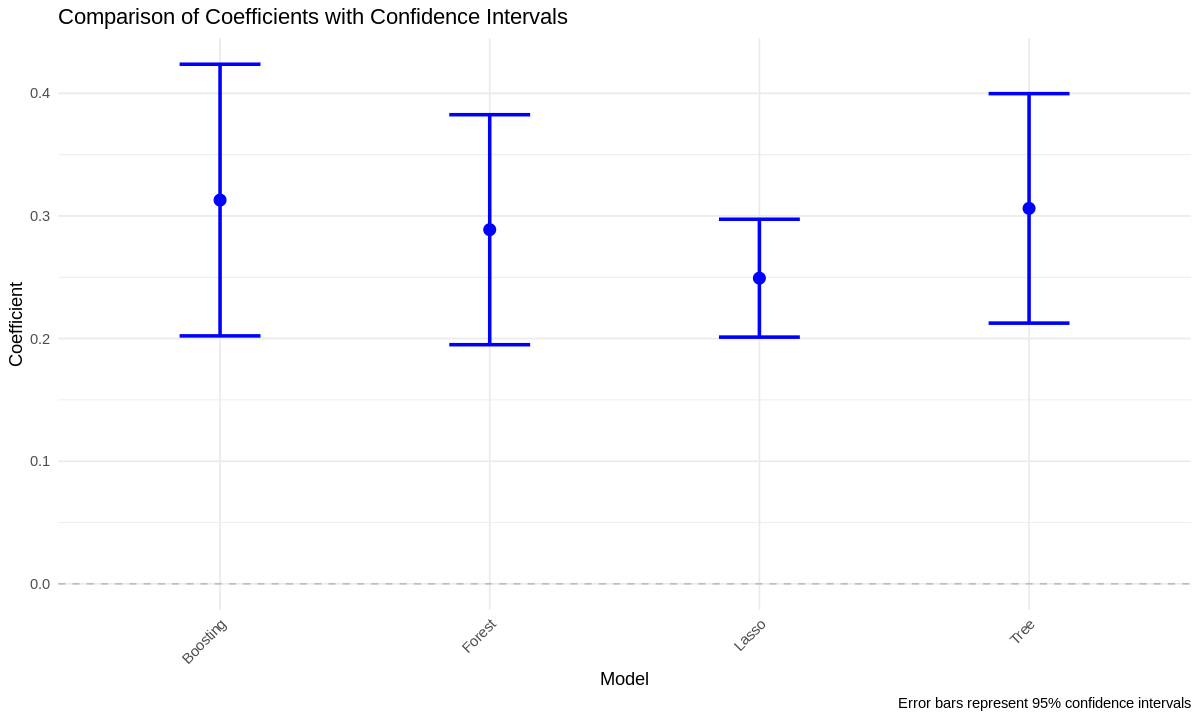

In [79]:
ggplot(results_df, aes(x = Model , y = Coefficient)) +
  geom_point(size = 3, color = 'blue') +
  geom_errorbar(aes(ymin = Lower_bound, ymax = Upper_bound),
                width = 0.3,
                color = 'blue',
                size = 1) +
  labs(title = 'Comparison of Coefficients with Confidence Intervals',
       x = 'Model',
       y = 'Coefficient',
       caption = 'Error bars represent 95% confidence intervals') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_hline(yintercept = 0, linetype = 'dashed', color = 'gray')


# Recommendation: Utilizing Lasso for DML

* Model Interpretability: By setting some coefficients to zero, Lasso creates sparse models, which enhances the clarity and interpretability of the model.

* Effective Variable Selection: Lasso's capability to shrink some coefficients to zero helps in selecting relevant variables, thus improving model generalization and mitigating overfitting.

* Regularization Benefits: The regularization component of Lasso penalizes large coefficients, which helps to prevent overfitting and yields a more robust model, especially in the presence of correlated variables.

* Overall Performance: Although methods like decision trees, boosting trees, and random forests are powerful, they might introduce complexity and overfitting issues when applied to DML. Lasso, being simpler and more interpretable, presents a clear advantage for DML applications.

In summary, the Lasso method strikes a balance between simplicity, interpretability, and performance, making it a suitable choice for your Double Machine Learning tasks.